# Estudio de Caso - Cálculo de Probabilidades
Una empresa de atención al cliente está evaluando la eficiencia de su servicio mediante el análisis del tiempo de atención telefónica. Los datos recopilados indican que el tiempo de atención sigue una distribución normal con una media de 10 minutos y una desviación estándar de 2 minutos. La gerencia desea conocer la probabilidad de que un cliente sea atendido en los siguientes casos:

• Menos de 8 minutos. 

• Entre 8 y 12 minutos.

• Más de 14 minutos.

Además, la empresa también recibe quejas por la cantidad de llamadas que se atienden en una hora. Los datos muestran que el número de llamadas entrantes sigue una distribución de Poisson con una media de 15 llamadas por hora. Se desea calcular la probabilidad de que en una hora se reciban:

• Exactamente 15 llamadas.

• Menos de 10 llamadas.

• Más de 20 llamadas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Cálculo de probabilidad de tiempo de atención

En base al modelo probabilístico dado para el tiempo de atención de los clientes, que se asume sigue una distribución normal con media de 10 minutos y desviación estándar de 2 minutos, se estiman las probabilidades mediante la función de distribución acumulada (CDF) para distintos escenarios: que el tiempo de atención sea inferior a 8 minutos, que se encuentre entre 8 y 12 minutos o que supere los 14 minutos.

In [ ]:
# Aplicación de la función de distribución acumulada (CDF) para los distintos escenarios

# Parametros del modelo (distribucón normal)
media = 10
desviacion = 2

# Probabilidad de que la atención sea menor a 8 minutos
menor_8 = stats.norm.cdf(8, media,desviacion)
print(f"La probabilidad de que la atención sea menor a 8 minutos es de un {menor_8*100:.1f}%")

# Probabilidad de que la atención esté entre 8 y 12 minutos
entre_8_y_12 = stats.norm.cdf(12, media, desviacion) - stats.norm.cdf(8, media, desviacion)
print(f"La probabilidad de que la atención este entre 8 y 12 minutos es de un {entre_8_y_12*100:.1f}%")

# Probabilidad de que la atención sea mayor a 14 minutos
mayor_14 = 1 - stats.norm.cdf(14, media, desviacion)
print(f"La probabilidad de que la atención sea mayor a los 14 minutos es de un {mayor_14*100:.1f}%")

La probabilidad de que la atención sea menor a 8 minutos es de un 15.9%
La probabilidad de que la atención este entre 8 y 12 minutos es de un 68.3%
La probabilidad de que la atención sea mayor a los 14 minutos es de un 2.3%


### Gráfico Distribución Normal – Verificación empírica de la adecuación 

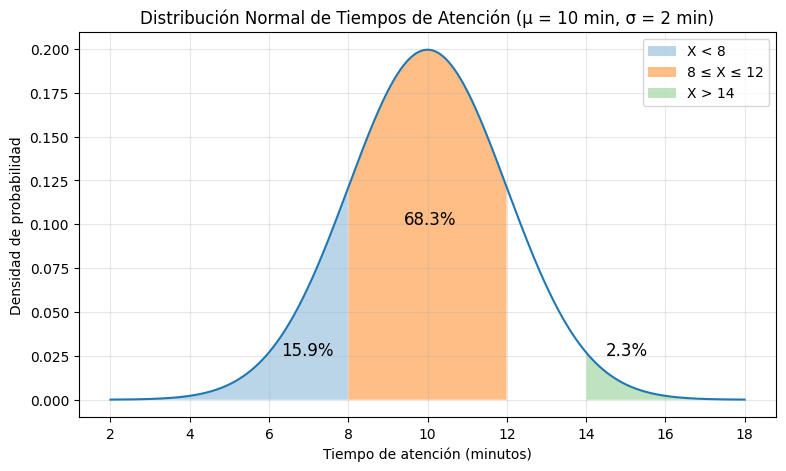

In [4]:
plt.figure(figsize=(9, 5))

#linspace: crea un arreglo con posibles valores de atención (limite inferior, limite superior, cantidad de puntos)
#promedio - 4*desv = liminte inferior
#promedio + 4*desv = limite supeior
#1000 = cantidad de puntos
x = np.linspace(media - 4*desviacion, media + 4*desviacion, 1000)

# pdf: determina la altura de la curva en un punto especifico del eje x (valores de x, media, desviación)
altura_densidad = stats.norm.pdf(x, media, desviacion)

# Curva del gráfico (valores en x, altura de densidad)
plt.plot(x, altura_densidad)

# Sombra región de probabilidades de tiempos de atención menor a 8 minutos
plt.fill_between(x, 0, altura_densidad, where=(x < 8), alpha=0.3, label="X < 8")
plt.text(6.3, 0.025, f"{menor_8:.1%}", fontsize= 12, color="black")
# Sombra región de probabilidades de tiempos de atención entre 8 y 12 lminutos
plt.fill_between(x, 0, altura_densidad, where=((x >= 8) & (x <= 12)), alpha=0.5, label="8 ≤ X ≤ 12")
plt.text(9.4, 0.1, f"{entre_8_y_12:.1%}", fontsize=12, color="black")
# Sombra región de probabilidades de tiempos de atención de más de 14 minutos
plt.fill_between(x, 0, altura_densidad, where=(x > 14), alpha=0.3, label="X > 14")
plt.text(14.5, 0.025, f"{mayor_14:.1%}", fontsize=12, color="black")

# Detalles del gráfico
plt.title("Distribución Normal de Tiempos de Atención (μ = 10 min, σ = 2 min)")
plt.xlabel("Tiempo de atención (minutos)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

El gráfico de la distribución normal de tiempos de atención permite ilustrar de manera visual las probabilidades obtenidas a partir del modelo teórico asumido. Las áreas sombreadas bajo la curva normal confirman gráficamente los cálculos realizados, mostrando que alrededor del 68.3% de los tiempos se concentran entre 8 y 12 minutos, un 15.9% son menores a 8 minutos y solo un 2.3% superan los 14 minutos. Esto valida que los resultados obtenidos mediante el uso de la distribución normal son coherentes con el comportamiento esperado del modelo.

### Cálculo de probabilidad de llamadas recibidas en una hora

En base al modelo dado que asume que la cantidad de llamadas recibidas en una hora sigue una distribución de Poisson con una media de 15 llamadas por hora, se estiman las probabilidades, utilizando la función de probabilidad (PMF) y la función de distribución acumulada (CDF) para distintos escenarios: recibir exactamente 15 llamadas en una hora, recibir menos de 10 llamadas y recibir más de 20 llamadas.

In [5]:
# Parámetro del modelo (distribución Poisson)
media_llamadas = 15

# Probabilidad de que se reciban exactamente 15 llamadas en 1 hora, aplicación función pmf
llamadas_15 = stats.poisson.pmf(15, media_llamadas)
print(f"La probabilidad de que se reciban 15 llamadas en una hora es aproximadamente de un {llamadas_15*100:.1f}%")

# Probabilidad de que se reciban menos de 10 llamadas en 1 hora, aplicación función cdf
menos_10_llamadas = stats.poisson.cdf(9, media_llamadas)
print(f"La probabilidad de que se reciban menos de 10 llamadas en una hora es aproximadamente de un {menos_10_llamadas*100:.1f}%")

# Probabilidad de que se reciban más de 20 llamadas en 1 hora, aplicación función cdf
mas_20_llamadas = 1 - stats.poisson.cdf(20, media_llamadas)
print(f"La probabilidad de que se reciban más de 20 llamadas en una hora es aproximadamente de un {mas_20_llamadas*100:.1f}%")

La probabilidad de que se reciban 15 llamadas en una hora es aproximadamente de un 10.2%
La probabilidad de que se reciban menos de 10 llamadas en una hora es aproximadamente de un 7.0%
La probabilidad de que se reciban más de 20 llamadas en una hora es aproximadamente de un 8.3%


## Gráfico Poisson – Verificación empírica de la adecuación
Para la verificación empirica se simulan 10 000 horas, con una media de 15 llamadas por hora. Se compara el histograma arrojado por las 10 mil horas simuladas con la probabilidad teórica arrojada por el modelo.

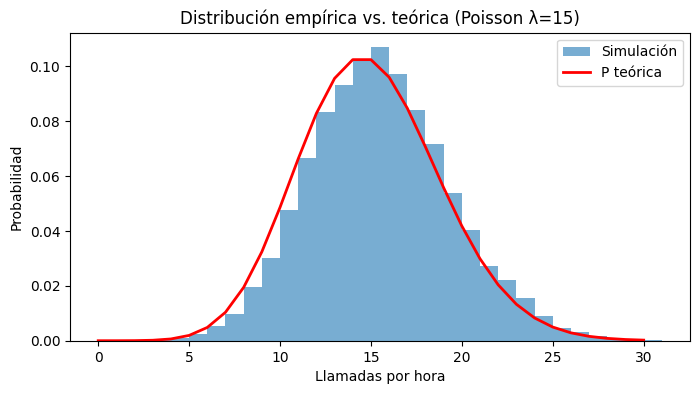

In [6]:
# Creación de modelo simulado (distribución de Poisson)
np.random.seed(42)
modelo = np.random.poisson(media_llamadas, size=10000)

plt.figure(figsize=(8, 4))

# Histograma de distribución de las simulaciones en el modelo de poisson
counts, bins, _ = plt.hist(modelo, bins=range(max(modelo)+2), density=True, alpha=0.6, label='Simulación')

# Valores que tomara el eje x
x = np.arange(0, max(modelo)+1)

# Curva de probabilidades teoricas de poisson
plt.plot(x, stats.poisson.pmf(x, media_llamadas), 'r-', lw=2, label='P teórica')

# Detalles del gráfico
plt.title('Distribución empírica vs. teórica (Poisson λ=15)')
plt.xlabel('Llamadas por hora')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

La comparación visual entre la distribución empírica obtenida mediante simulación de 10 mil horas y la distribución teórica de Poisson con parámetro λ = 15 muestra una alta concordancia. El histograma de frecuencias observadas se ajusta de manera adecuada a la curva teórica, sin evidenciar desviaciones sistemáticas relevantes, lo que sugiere que el modelo simulado representa correctamente la distribución teórica esperada.

Esto respalda a su vez que las probabilidades calculadas previamente sobre la ocurrencia de cierta cantidad de llamadas en una hora son consistentes y se encuentran adecuadamente fundamentadas en el modelo probabilístico asumido.

### **Preguntas Finales**

### ¿Por qué la distribución normal es adecuada para modelar el tiempo de atención al cliente?

La distribución normal es la adecuada para modelar el tiempo de atención al cliente porque esta es un tipo de variable aleatoria continua que toma valores dentro de un rango amplio. Además, en variables como tiempos de espera o atención, los datos tienden a agruparse alrededor de un valor promedio, con una menor frecuencia hacia los extremos, lo que precisamente representa la distribución normal, por lo que es la ideal para modelar probabilidades en los tiempos de atención al cliente.

### ¿Por qué la distribución de Poisson es adecuada para modelar el número de llamadas en una hora?

La distribución de Poisson es adecuada para modelar el número de llamadas en una hora porque permite representar eventos que ocurren de forma aleatoria, pero con una frecuencia promedio conocida, dentro de un periodo de tiempo fijo. Esto encaja bien con el caso de estudio, donde se busca estimar la probabilidad de recibir cierta cantidad de llamadas por hora, sabiendo que en promedio se reciben 15. Por lo tanto, este escenario se adecua correctamente con una distribución de Poisson.